## Introduksjon til klassifisering



In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

from matplotlib.pyplot import *
import seaborn
from pandas import *

## Hva er klassifisering?
Klassifisering er en form for maskinlæringsproblem der man ønsker å trene maskinen til å finne hvilken kategori (klasse) noe hører til. Tenk for eksempel at du er en  maskin og jeg skal trene deg til å plukke ut bøker som jeg liker. Det første vi må gjøre er å representere bøkene med tall. For eksempel kan jeg ha hvor skummel en bok er på x aksen og hvor morsom en bok er på y aksen. Da kan vi plotte det opp i et scatterplot slik:

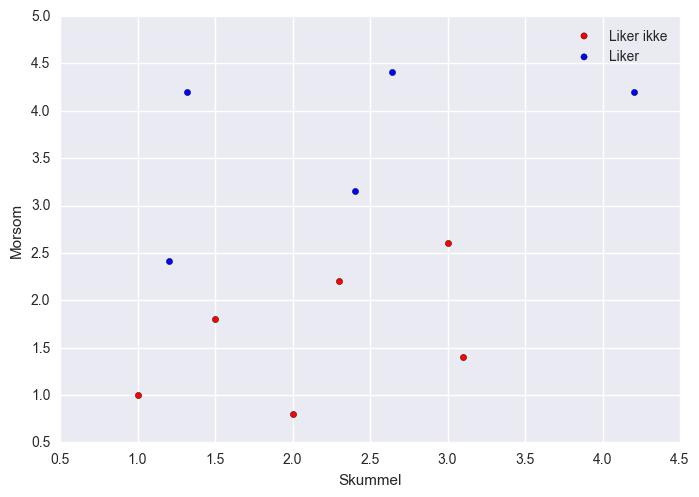

In [2]:
data = read_csv('../datasets/small_examples/books.csv') # Lese inn data

# TODO: Bestemme om vi skal dele opp dataen på denne måten (for å få labels)
# TODO: Skal vi forklare plottingen og indekseringen mer eller skal vi ha en egen notebook 
#       om behandling av dataframes?


data_klasse1 = data.loc[data['Klasse'] == 0] 
data_klasse2 = data.loc[data['Klasse'] == 1]

scatter(data_klasse1['Skummel'], data_klasse1['Morsom'], c='r', label='Liker ikke')
scatter(data_klasse2['Skummel'], data_klasse2['Morsom'], c='b', label='Liker')

xlabel('Skummel')
ylabel('Morsom')

legend()
show()

De blå punktene er bøker som jeg liker og de røde punktene er bøker jeg ikke liker. Du ser kanskje at det er et mønster her? Hvis jeg nå kommer med en ny, ukjent bok som er middels skummel og veldig lite morsom. (Representert i plottet under som et spørsmåltegn)


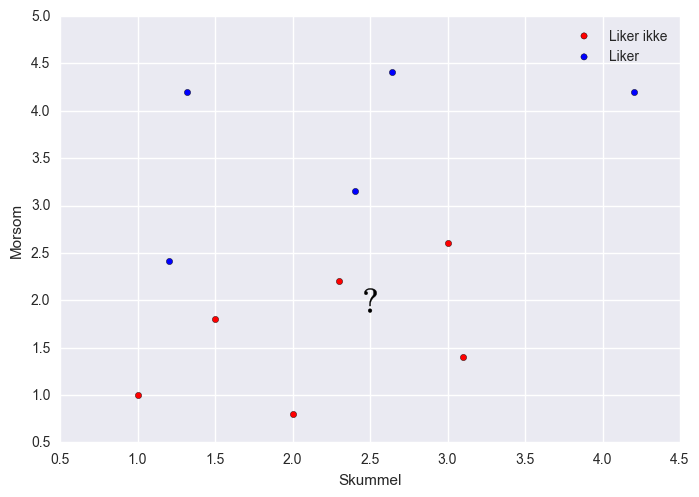

In [3]:
figure()

scatter(data_klasse1['Skummel'], data_klasse1['Morsom'], c='r', label='Liker ikke')
scatter(data_klasse2['Skummel'], data_klasse2['Morsom'], c='b', label='Liker')
scatter(2.5,2,c='k',s=300,marker='$?$')

xlabel('Skummel')
ylabel('Morsom')

legend()
show()

**Oppgave 1:** Tror du at jeg kommer til å like eller ikke like boken? Hvorfor? Fyll inn svar i cellen under

In [4]:
# Ditt svar her

**Oppgave 2:** Hva om jeg har en bok representert av punktet (2,3.6)? Kommer Jeg til å like eller ikke like boken?

In [5]:
# Ditt svar her

Men å se på plottet og avgjøre manuelt hvilken klasse et eksempel tilhører, er ikke spesielt presist. Det vi ønsker er å finne en måte for maskinen å lære og avgjøre klassen til et eksempel basert på egenskaper

## Nærmeste Nabo

En enkel måte å finne hvilken klasse et eksempel tilhører, er å se på *det nærmeste kjente eksempelet*. Det er rimelig å anta at ting som er like har samme klasse. Hvis jeg for eksempel finner en ny bok, og den er ganske lik som en annen bok jeg liker, er det sannsynlig at jeg vil like den nye boka også. 
Så en mulig taktikk for å klassifisere et nytt punkt, `x_ny`, er å først finne det nærmeste andre punktet, `x_nabo`. Så kan vi sjekke hvilken klasse det har og så si at klassen til `x_ny`, er den samme som klassen til `x_nabo`. Med andre ord: Hvis den nye boka ligner mest på en bok jeg vet jeg liker, så gjetter vi at jeg liker den nye boka også! Denne algortimen kaller vi *Nærmeste Nabo*

**Oppgave 3:** Ta en titt på figuren over igjen. Hvilket punkt er den nærmeste naboen til det ukjente punktet? Hvilken klasse får det ukjente punktet da?

In [6]:
# ditt svar her

## K Nærmeste Naboer
Hva om det plutselig er en middels skummel og lite morsom bok som jeg plutselig liker, selv om jeg vanligvis ikke gjør det? Da kan plottet vårt for eksempel se slikt ut

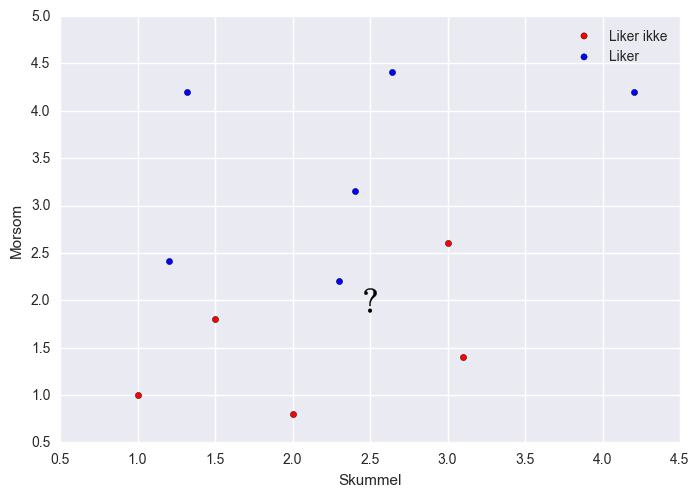

In [7]:
figure()

# Endre datapunktet
data.ix[8]['Klasse'] = 1

data_klasse1 = data.loc[data['Klasse'] == 0] 
data_klasse2 = data.loc[data['Klasse'] == 1]

scatter(data_klasse1['Skummel'], data_klasse1['Morsom'], c='r', label='Liker ikke')
scatter(data_klasse2['Skummel'], data_klasse2['Morsom'], c='b', label='Liker')

scatter(2.5,2,c='k',s=300,marker='$?$')

xlabel('Skummel')
ylabel('Morsom')

legend()
show()

** Oppgave 4: ** Hvilken klasse vil spørsmåltegnet få nå? Virker det rimelig?

In [8]:
# Ditt svar her

Som vi ser er Nærmeste Nabo algoritmen følsom for "støy" i dataene. En bok som er litt anderledes vil påvirke anbefalingen av fremtidige bøker. En måte å komme rundt dette på, er å **spørre mer enn en nabo.** Hvis vi for eksempel spør de tre nærmeste naboene vil vi i dette tilfellet få ("liker", "liker ikke", "liker ikke"). Det er et flertall av "liker ikke", så vi setter `x_ny` til å også få klassen "liker ikke". Dette kalles *K nærmeste nabo algoritmen* hvor k er antallet nærmeste naboer vi spør. Det er gjerne sånn at dersom vi spør flere naboer, så blir vi sikrere, men hvis vi spør for mange kan det også gå galt. 

I det mest ekstreme tilfellet vil vi spørre alle punktene og da vil vi alltid ende opp med klassen som flest punkter tilhører. I vårt eksempel vil alle bøker få klassen "liker" siden det er flest punkter i den klassen. 
Det å finne den riktige balansen mellom høy og lav k er et eksempel på en av de viktigste utfordringene i maskinlæring, nemlig valg av parametere. Vi skal snakke mer om det siden. 

## KNN i kode

Hvis du har kjennskap til programmering fra før har du kanskje begynt å tenke hvordan KNN kan skrives i kode. Jeg anbefaler alle som har lyst til å prøve å implementere algoritmen selv til å gjøre det. Det er veldig lærerikt og alt man trenger å gjøre er å søke gjennom alle punkter, finne de k nærmeste punktene og telle opp hvilken klasse som har flertall blant de. 

Men i dette kurset skal vi bruke scikit learn sin ferdige klasse for K Nærmeste Naboer. Den brukes veldig likt som vi gjorde for linær regresjon:

In [9]:
from sklearn.neighbors import KNeighborsClassifier # importere klassifikator 
clf = KNeighborsClassifier(n_neighbors=3) # Lage KNN klassifikator med k=3
clf.fit(data[['Skummel','Morsom']],data['Klasse']) # Trene klassifikatoren

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Når vi har trent klassifikatoren med clf.fit(x,y) kan vi klassifisere nye eksempler med clf.predict(x_ny). 

In [10]:
clf.predict([[2.5,2]])

array([ 0.])

Som forventet ble det ukjente punktet klassifisert som `0` ("ikke liker") av KNN med `k=3`

## Overtilpassing

Akkurat som for regresjon, kan overtilpassing være et problem. Spesielt hvis eksemplene overlapper litt. Sett at vi har følgende data. Hvilken av de to linjene tror du passer best?

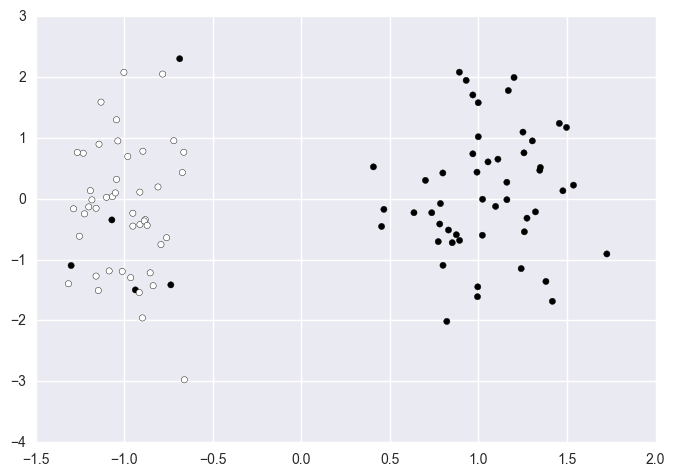

In [11]:
from sklearn.datasets import make_classification

figure()
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1,flip_y=0.05,random_state=100)
scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
show()

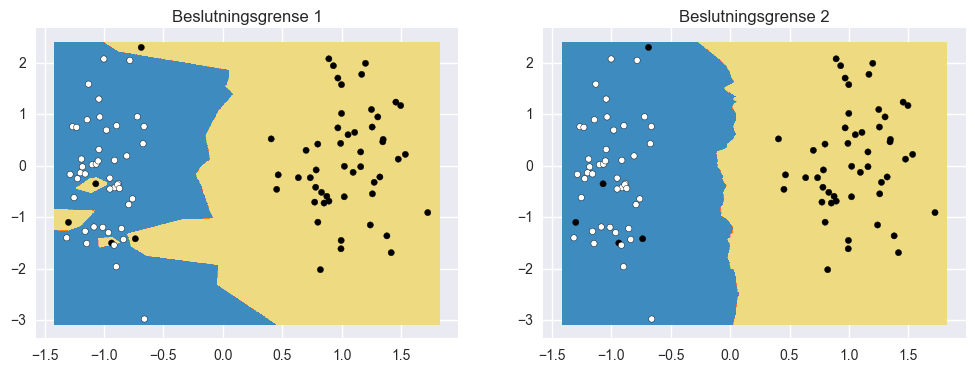

In [12]:
from useful_tools import plot_boundary

figure(figsize=(12, 4))

clf1 = KNeighborsClassifier(n_neighbors = 1)
clf1.fit(X1,Y1)
subplot(1,2,1)
plot_boundary(X1,clf1,padding=0.1,plot_step=0.005)
scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
title('Beslutningsgrense 1')

clf2 = KNeighborsClassifier(n_neighbors = 10)
clf2.fit(X1,Y1)
subplot(1,2,2)
plot_boundary(X1,clf2,padding=0.1,plot_step=0.005)
scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
title('Beslutningsgrense 2')
show()

Beslutningsgrense 1 passer perfekt til dataen, men den er veldig detaljert og kronglete. Den virker ikke som den generaliserer bra til ukjent data. Beslutningsgrense 2 passer litt dårligere men den er mer generell. 

Så for å måle hvor bra en klassifiseringsmodell er, er det svært viktig at vi deler inn i trening og testdata. 

**TODO: Skal vi ha med et eksempel til her (f.eks. iris) eller skal vi gå rett på en oppgave??** 

<IPython.core.display.Javascript object>


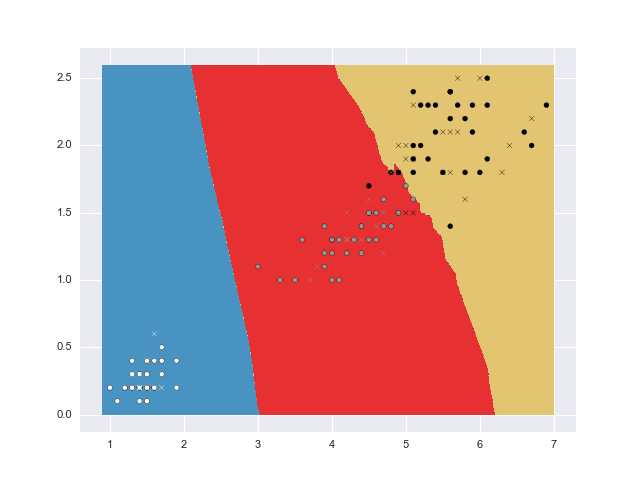

treningsnøyaktighet:  0.97
testnøyaktighet:  0.92


In [21]:
# Laste inn data
iris = load_iris() #TODO: kanskje lagre som csv og laste inn på samme måte som før for å være konsekvent
F1,F2 = 2,3 
data = iris.data[:,[F1,F2]]

# importere train_test_split
from sklearn.model_selection import train_test_split

# splitte inn i trenings og testdata
train_data, test_data,train_target, test_target = train_test_split(data, iris.target, test_size=0.33, random_state=54)

# lage og trene en KNN klassifikator med k=10
clf = KNeighborsClassifier(n_neighbors = 10)
clf.fit(train_data,train_target)

# tegne plot
figure() # ny figur
plot_boundary(data,clf,padding=0.1,plot_step=0.005) # tegn opp beslutningsgrensa
scatter(train_data[:, 0], train_data[:, 1], marker='o', c=train_target) # tegn treningsdata med sirkler
scatter(test_data[:, 0], test_data[:, 1], marker='x', c=test_target) # tegn testdata med kryss
show() # vis fram figuren

#TODO: bruke hjelpefunksjon for å skrive ut trening og testnøyaktighet
print "treningsnøyaktighet: ",np.mean(clf.predict(train_data)==train_target)
print "testnøyaktighet: ",np.mean(clf.predict(test_data)==test_target)

**Oppgave 5:** Bruk alt du har lært om KNN til å klassifisere et nytt datasett

Begynn med å lese inn data

In [23]:
#TODO: kanskje lagre som csv og laste inn på samme måte som før for å være konsekvent
#skal vi bruke et ekte datasett i stedet for eller skal vi komme på en historie for det falske?

from sklearn.datasets import make_classification

data, target = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=2,flip_y=0.05,random_state=5)

Splitt inn i trening og testdata med `train_test_split`

In [25]:
train_data, test_data,train_target, test_target = train_test_split(data, target, test_size=0.33, random_state=54)

Lag en klassifikator med `KNeighborsClassifier` og tren den på **trenigsdata** med `.fit(x,y)`

In [47]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(train_data,train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Lag en figur som viser treningsdata som sirkler og testdata som kryss. Vis også frem beslutningsgrensa til klassifikatoren din i samme plot. 

<IPython.core.display.Javascript object>


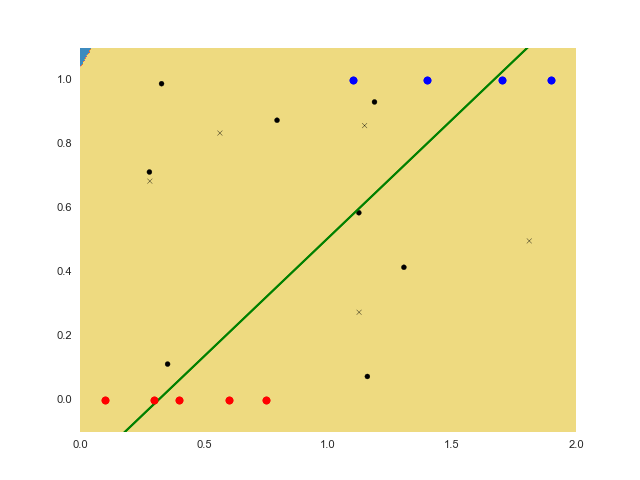

In [48]:
figure()
plot_boundary(X1,clf,padding=0.1,plot_step=0.005)
scatter(train_data[:, 0], train_data[:, 1], marker='o', c=train_target)
scatter(test_data[:, 0], test_data[:, 1], marker='x', c=test_target)
show()

Bruk `.predict` til å finne klassene til testdata. Print ut trenings og testnøyaktighet

In [49]:
predictions = clf.predict(test_data)

print "treningsnøyaktighet:", np.mean(clf.predict(train_data)==train_target)
print "testnøyaktighet:", np.mean(clf.predict(test_data)==test_target)

treningsnøyaktighet: 0.940298507463
testnøyaktighet: 0.878787878788


**Oppgave 6:** Prøv å kjøre cellene på nytt med andre verdier av k **(hint: `n_neighbors`)**. Prøv for eksempel k = 1, 10, 30 og 67. Hvilken verdi gir størst testnøyaktighet. 

Skriv ditt svar her:

**Oppgave 7:** Hvilken effekt har det på beslutningsgrensa? Hvilken sammenheng har det med test nøyaktigheten?

Skriv ditt svar her:

# Logistisk regresjon

KNN er en algoritme for klassifisering.
 La oss se på et 1d eksempel. 

K nærmeste nabo er bare en av mange algoritmer for å klassifisere data basert på egenskaper.
En annen måte å gjøre klassifisering på er å bruke regresjon litt sånn som vi har sett på tidligere i kurset. La oss se på et 1 dimensjonalt eksempel

<IPython.core.display.Javascript object>


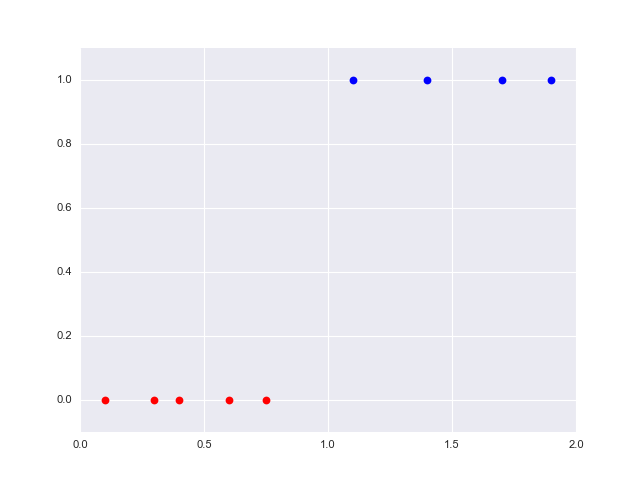

In [58]:
# TODO: skal vi lese inn dataene for å være konsekvente?
# TODO: skal vi bytte ut med ekte data evt. komme på en historie til dataen?
x = np.array([0.75,0.1,0.3,0.4,0.6,1.1,1.4,1.7,1.9])
y = np.array([0,  0,  0,  0,  0,1,  1,1,  1])

x0 = x[y==0]
y0 = y[y==0]

x1 = x[y==1]
y1 = y[y==1]

figure()
plot(x0,y0,'ro')
plot(x1,y1,'bo')
axis([0,2,-0.1,1.1])
show()

Her er alle eksemplene med klasse "RØD" satt 0 på y aksen og eksemplene med klasse "BLÅ" er satt til 1. Vi ønsker å finne hvor skillet mellom klassene går. Den enkleste løsningen vil være linær regresjon. Alt vi trenger å gjøre er å tilpasse en linje til punktene som før. Så kan vi terskle linja.  Dvs. Vi kan si at der linja er over en hvis grense. f.eks 0.5 er det klasse "BLÅ" og ellers er det klasse "RØD"

<IPython.core.display.Javascript object>


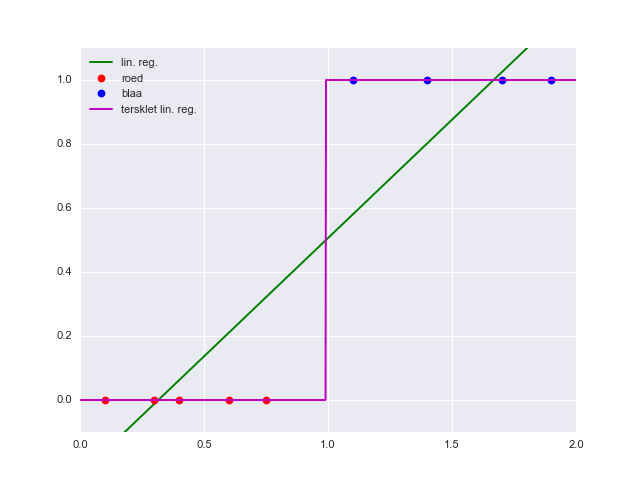

In [82]:
# importere LinearRegression
from sklearn.linear_model import LinearRegression 

# lage og trene modellen
reg = LinearRegression()
reg.fit(x[:,np.newaxis],y[:,np.newaxis])

# lage en linje for plotting
t = np.linspace(0,2,1001)
l = reg.predict(t[:,np.newaxis])

figure() # opprette ny figur
plot(t,l,'g-') # tegne modellen som linje
plot(x0,y0,'ro') # tegne den røde klassen
plot(x1,y1,'bo') # tegne den blå klassen 
axis([0,2,-0.1,1.1]) # justere aksene
plot(t,l>=0.5,'m-')
legend(['lin. reg.','roed','blaa','tersklet lin. reg.'],loc=2)
show()

Et problem er at linja passer ganske dårlig til dataene og vil bli veldig forskjellig allerede hvis vi legger til et lite punkt. 

<IPython.core.display.Javascript object>


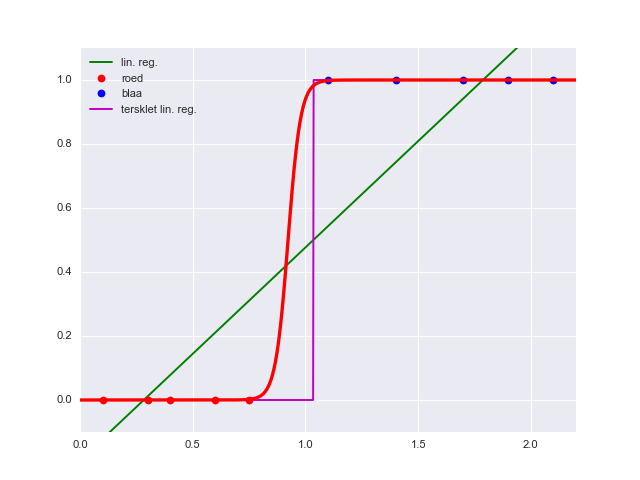

In [90]:
x = np.array([0.75,0.1,0.3,0.4,0.6,1.1,1.4,1.7,1.9,2.1])
y = np.array([0,  0,  0,  0,  0,1,  1,1,  1,1])

x0 = x[y==0]
y0 = y[y==0]

x1 = x[y==1]
y1 = y[y==1]

# lage og trene modellen
reg = LinearRegression()
reg.fit(x[:,np.newaxis],y[:,np.newaxis])

# lage en linje for plotting
t = np.linspace(0,2.2,1001)
l = reg.predict(t[:,np.newaxis])

figure() # opprette ny figur
plot(t,l,'g-') # tegne modellen som linje
plot(x0,y0,'ro') # tegne den røde klassen
plot(x1,y1,'bo') # tegne den blå klassen 
axis([0,2.2,-0.1,1.1]) # justere aksene
plot(t,l>=0.5,'m-')
legend(['lin. reg.','roed','blaa','tersklet lin. reg.'],loc=2)
show()

Vi vil helst ikke ha en modell som er så lett påvirket av små endringer i dataene. Heldigvis er det lett å fikse dette problemet. Vi bytter ut den linære funksjonen med en *logistisk funksjon*. 
Denne terskler vi også på 0.5. En logistisk funkson passer mye bedre med klassifikasjonsdata

<IPython.core.display.Javascript object>


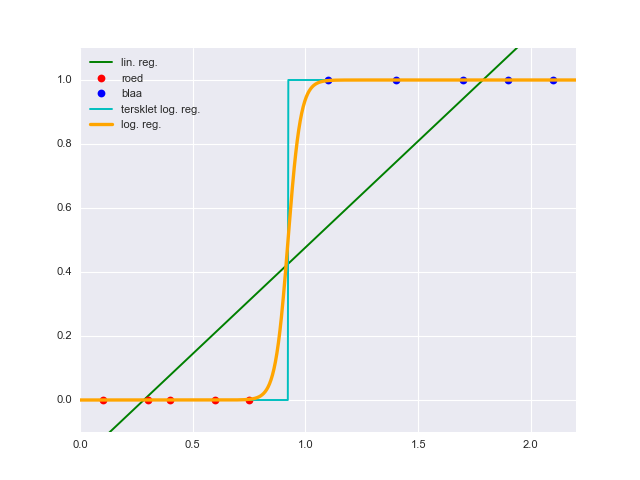

In [96]:
reg2 = LogisticRegression(C=1e5)
reg2.fit(x[:,np.newaxis],y[:,np.newaxis])

def logistic_model(x):
    return 1 / (1 + np.exp(-x))

loss = logistic_model(t * reg2.coef_ + reg2.intercept_).ravel()

figure() # opprette ny figur
plot(t,l,'g-') # tegne modellen som linje
plot(x0,y0,'ro') # tegne den røde klassen
plot(x1,y1,'bo') # tegne den blå klassen 
plot(t,loss>=0.5,'c-') # plotte terskel
plot(t, loss, color='orange', linewidth=3) # plotte logistisk funksjon

axis([0,2.2,-0.1,1.1]) # justere aksene
legend(['lin. reg.','roed','blaa','tersklet log. reg.','log. reg.'],loc=2)
show()
show()

## Logistisk regresjon for flere dimensjoner
Hittil har vi kun sett på logistisk regresjon klassifisering for en 1 dimensjonal egenskap. Men i praksis har vi gjerne flere. Prinsippet er det samme, men i stedet for å tilpasse en linje tilpasser man en høyere dimensjons grense, for eksempel et plan. Under er figur som hviser logistisk regresjons grense i to dimensjoner

<IPython.core.display.Javascript object>


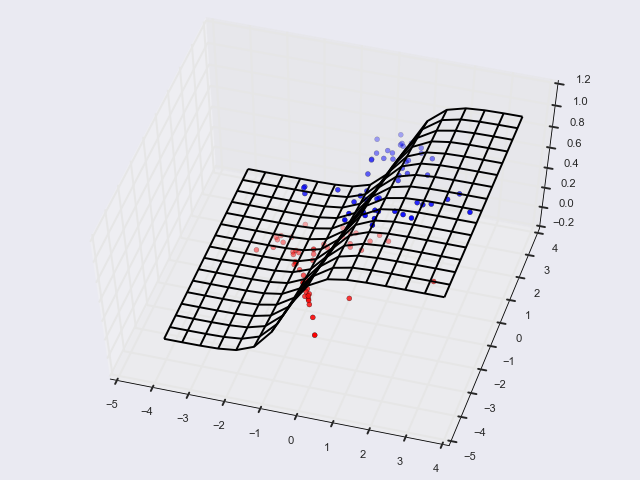

In [105]:
# skru på interaktive plot
% matplotlib notebook 
from mpl_toolkits.mplot3d import Axes3D # importere verktøy for 3d plot

# lage og trene klassifikator
clf_log = LogisticRegression(C=1e5)
clf_log.fit(X1,Y1)

# lage ny figur og tegne 3d scatterplot
fig = figure()
ax = Axes3D(fig)
ax.scatter(X1[:,0][Y1==0], X1[:,1][Y1==0], Y1[Y1==0],facecolors='r')
ax.scatter(X1[:,0][Y1==1], X1[:,1][Y1==1], Y1[Y1==1],facecolors='b')

# regne ut beslutningsplanet
x = y = np.arange(-4, 4, 0.5)
X, Y  = np.meshgrid(x, y)
def model2d(c,b,x,y):
    return model(c[0]*x + c[1]*y + b)
Z = model2d(clf_log.coef_[0],clf_log.intercept_,X,Y)

# plotte beslutningsplanet som en wireframe
ax.plot_wireframe(X, Y, Z,color ='k')
show()

Når du terskler beslutningplanet blir det som å kutte med en kniv. Det kuttet du får da, blir beslutningsgrensa for 2 dimensjoner

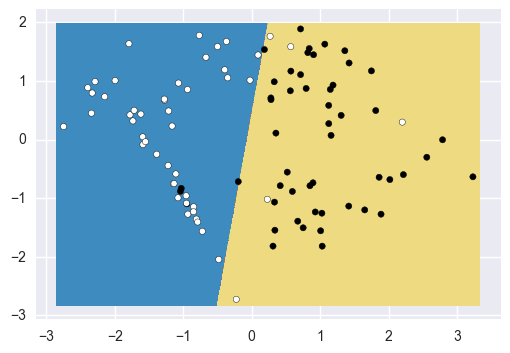

In [109]:
# skru ac interaktive plot
% matplotlib inline

figure() # ny figur
plot_boundary(X1,clf_log,padding=0.1,plot_step=0.005) # tegne grense
scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1) # tegne scatterplot
show()

Siden logistisk regresjon alltid terskler, hvilket fungerer som et slags "kutt", så hvil beslutningsgrensa alltid bli en rett strek. 

## Logistisk regresjon i kode

Scikit learn har en ferdig pakke for logistisk regresjon også. Den heter `LogisticRegression` og importeres fra `sklearn.linear_model`. Du kan lage en logistisk regresjon klassifikator med `LogisticRegression()` og trene den som før med `.fit(x,y)`

**Oppgave 8** Tren en logistisk regresjon kode på et nytt datasett. 

**TODO:** hva slags datasett skal vi bruke her? samme som over?